# Supplemental Figure 12 — Mutational outcomes from retron-mediated editing of left and right linker regions.


Unless explicitly noted otherwise (e.g. indicated as being from Zenodo), all data used for the visualisations was generated using the Illumina or Nanopore pipeline.

---

### Figure Summary

<div style="text-indent:-2em; padding-left:2em"><strong>(A)</strong> Illumina-based analysis of linker variants after mutagenesis with the retron-encoded
linker library. </div>  
<div style="text-indent:-2em; padding-left:2em"><strong>(B)</strong>Correlation between encoded and observed linker variants. </div>  
<div style="text-indent:-2em; padding-left:2em"><strong>(C)</strong>Distribution of WT and edited linker
combinations after one passage of phage editing.</div>  
<div style="text-indent:-2em; padding-left:2em"><strong>(D)</strong> Combined effects of DMS and linker library editing. </div> 

## Notebook Setup
----------------------------

Run the following cell to import all required libraries, define plotting settings, and configure the environment for data analysis and visualization.

In [2]:
# --- Import necessary modules ---
import os
import sys
import json
import pickle as pkl
from importlib import reload
from pathlib import Path

notebook_dir = Path().resolve()
repo_root = notebook_dir.parent 
sys.path.append(str(repo_root))

import numpy as np
import pandas as pd
from scipy import stats
import scipy
from Bio import SeqIO
import csv
from collections import Counter
from Bio.SeqIO import QualityIO
from scripts.utils import dna_rev_comp, translate_dna2aa
from scripts.preprocessing_functions import *
from scripts.plotting import *
import matplotlib.colorbar as mcolorbar 
from scripts.Nanopore_functions import *
from scripts.Illumina_functions import *
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib as mpl
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap
from scripts.linker_analysis_functions  import *


# ======================== PLOTTING SETTINGS ========================

# --- Custom color map for mutation visualization ---
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", [
    "#22577A",  # Deep blue
    "#38A3A5",  # Teal
    "#57CC99",  # Medium green
    "#80ED99",  # Bright green
    "#C7F9CC"   # Light pastel green
], N=256)

# --- Seaborn theme configuration ---
custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.linewidth": 1
}
sns.set_theme(context="paper", style='ticks', palette="Greys_r", rc=custom_params)

# --- General matplotlib settings ---
fs = 8  # font size
plt.rcParams['svg.fonttype'] = 'none'
mpl.rcParams.update({
    'font.family': 'Avenir Next',
    'font.weight': 'demi', 
    'font.size': fs,
    'text.color': '#231F20',
    'axes.labelcolor': '#231F20',
    'xtick.color': '#231F20',
    'ytick.color': '#231F20',
    'axes.edgecolor': '#231F20',
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'pdf.fonttype': 42,
    'text.usetex': False
})
sns.set_context("paper", rc={
    "font.size": fs,
    "axes.titlesize": fs + 1,
    "axes.labelsize": fs,
    "axes.linewidth": 1,
    "xtick.labelsize": fs,
    "ytick.labelsize": fs,
    "legend.fontsize": fs,
    "legend.title_fontsize": fs + 1
})

# ======================== LAYOUT PARAMETERS ========================

# --- Pre-defined figure dimensions for multi-panel plots ---
hi = 10.5 * 0.75
wi3 = 2.24
wi2 = 4.76
wi1 = 7.24
nr = 5

# --- Utility for shortening sample names ---
short_fn = np.vectorize(lambda x: x[:5])

## Figure S12A: Illumina-based analysis of linker variants after mutagenesis with the retron-encoded linker library.
----------------------------
Variants include both on-target and functional off-target edits (e.g., silent
mutations or indels that preserve reading frame). GS and SG linkers are included as WT on the
amino acid level but carry synonymous mutations at the DNA level. Only variants representing `>0.05%` of reads are shown.

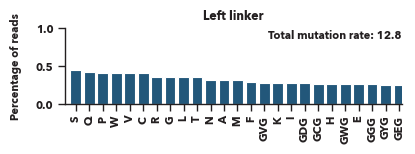

In [3]:
# === Load and preprocess linker distribution data for RL1, BC1 ===
left_linker_BC1 = pd.read_csv(f"{repo_root}/final_output/Illumina/Linker_Library_Mutagenesis_10-8/R1/enrichments/AA/RL1_BC1_S1_R1_AA_linker_distribution.csv", index_col=0).T
y_vals_perc_l = left_linker_BC1.loc["0", :]
left_linker_BC1 = left_linker_BC1.iloc[:, 1:]
right_linker_BC1 = pd.read_csv(f"{repo_root}/final_output/Illumina/Linker_Library_Mutagenesis_10-8/R2/enrichments/AA/RL1_BC1_S1_R2_AA_linker_distribution.csv", index_col=0).T
y_vals_perc_r = right_linker_BC1.loc["0", :]
right_linker_BC1 = right_linker_BC1.iloc[:, 1:]




left_linker_BC1[:] = np.sort(left_linker_BC1.values, axis=0)
top10_cols = left_linker_BC1.iloc[0].nlargest(25).index
left_linker_BC1 = left_linker_BC1.loc[:, top10_cols]

bar_width = 0.8
x_vals = [x + bar_width for x in range(len(left_linker_BC1.columns))]
y_vals= left_linker_BC1.loc["0", :]

fig, ax = plt.subplots(figsize=(wi1 * 0.6, hi / 8))
ax.set_ylim(0.0, 1.0)
ax.set_yticks([0.0, 0.5, 1.0])
ax.set_ylabel("Percentage of reads", labelpad=10)

ax.bar(x_vals, y_vals, color="#22577A", align='center', width=bar_width)

ax.set_xticks(x_vals)
ax.set_xticklabels(left_linker_BC1.columns, rotation=90, fontsize=8)

ax.set_title("Left linker")
total_rate = round(sum(y_vals_perc_l), 1)
ax.text(0.8, 0.9, f"Total mutation rate: {total_rate}",
        transform=ax.transAxes, ha='center', va='center', fontsize=8)

ax.set_xlim(-0.003, len(x_vals))


# plt.savefig("final_output/RL1/Linker_mutations_after_mutagenesis_barplot_left_linker.pdf", bbox_inches="tight", dpi=600)
# plt.savefig("final_output/RL1/Linker_mutations_after_mutagenesis_barplot_left_linker.png", bbox_inches="tight", dpi=600)
plt.show()


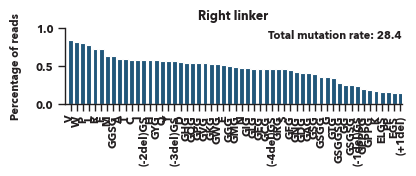

In [5]:
x_vals = list(range(len(right_linker_BC1.columns)))
y_vals = right_linker_BC1.loc["0", :]

y_vals_perc = left_linker_BC1.loc["0", :]


fig, ax = plt.subplots(figsize=(wi1 * 0.6, hi / 8))

ax.set_ylim(0.0, 1.0)  
ax.set_yticks([0.0, 0.5, 1.0])
ax.set_ylabel("Percentage of reads", labelpad=10)


bar_width = 0.8
x_vals = [x + bar_width for x in range(len(right_linker_BC1.columns))]
ax.bar(x_vals, y_vals, color="#22577A", align='center', width=bar_width)
ax.set_xticks([x + bar_width / 2 for x in range(len(right_linker_BC1.columns))])  


ax.set_xticks(x_vals)
ax.set_xticklabels(right_linker_BC1.columns, rotation=90, fontsize=8)

total_rate = round(sum(y_vals_perc_r), 1)

ax.set_title("Right linker")
ax.text(0.8, 0.9, f"Total mutation rate: {total_rate}",
        transform=ax.transAxes, ha='center', va='center', fontsize=8)

ax.set_xlim(-0.1, len(x_vals)) 



# plt.savefig("final_output/RL1/Linker_mutations_after_mutagenesis_barplot_right_linker.pdf", bbox_inches='tight', dpi=600)
plt.show()

## Figure S12B: Correlation between encoded and observed linker variants.
----------------------------
Scatter plots compare the relative abundance of encoded linker variants in the plasmid input 
library to their observed frequency in edited phage populations. Left and right linker data are
plotted separately. Spearman correlation values reflect the extent to which the observed
mutational spectrum mirrors the library design

In [5]:
# --- Define paths and constants ---
homedir = f"{repo_root}/data/Illumina/RAMPhaGE_Plasmid_Library_NGS"
Bc = "BC1" # barcode
read_dir = "R1" 
variant = "RetronLib"
section = "S1"
linker_site = "left" # Change to either "left" or "right"

132 Sequences are excluded, since LOV2 start site could not be found in the reference (due to '-' i.e. insertions at the start of LOV2)
639 reads excluded due to frameshifts
INESLL -> L
INESQL -> Q
INESWL -> W
INESTL -> T
INESVL -> V
INESPL -> P
INESCL -> C
INESAL -> A
INESSL -> S
INESHL -> H
INESGL -> G
INESIL -> I
INESML -> M
INESNL -> N
INESKL -> K
INESGVGL -> GVG
INESFL -> F
INESRL -> R
INESEL -> E
INESDL -> D
INESYL -> Y
INESGWGL -> GWG
INESGKGL -> GKG
INESGLGL -> GLG
INESGRGL -> GRG
INESGAGL -> GAG
INESGTGL -> GTG
INESGCGL -> GCG
INESGMGL -> GMG
INESGHGL -> GHG
INESGIGL -> GIG
INESGYGL -> GYG
INESGQGL -> GQG
INESGDGL -> GDG
INESGEGL -> GEG
INESPPL -> PP
INESGGGL -> GGG
INESGFGL -> GFG
INESGPPPGL -> GPPPG
INESGPGL -> GPG
INESGNGL -> GNG
INESGPPPPGL -> GPPPPG
INESGSGL -> GSG
INESGSGSGL -> GSGSG
INESGGSGL -> GGSG
INL -> (-2del)
INESGSGGL -> GSGG
INEL -> (-1del)
INESGGL -> GG
INESGSGGSGL -> GSGGSG
INESGPPGL -> GPPG
KL -> (-4del)K


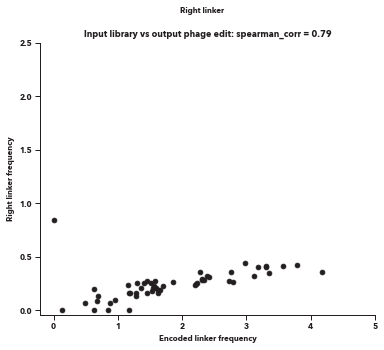

In [6]:
#--- Load configuration and reference amplicon ---
with open(f"{homedir}/config.json") as f:
    config = json.load(f)
ref_alignment_region = config["amplicon"]

#--- Define LOV2 insertion site coordinates ---
LOV_startseq = "gccacaa".upper() ## LOV2 start # set region of interest, that has to be included in the reads to be considered for the analysis, e.g. LOV2 start site
LOV_endseq = "tgctgaaaac".upper() ## LOV2 end

LOV2_start_idx = ref_alignment_region.index(LOV_startseq)
LOV2_end_idx = ref_alignment_region.index(LOV_endseq) + len(LOV_endseq)

#--- Create output directory if it doesn't exist ---
FigFolder = f"{repo_root}/final_output/Illumina/RAMPhaGE_Plasmid_Library_NGS/{Bc}_{read_dir}/"
if not os.path.exists(FigFolder):
    os.makedirs(FigFolder)  

#--- Load BLAST alignments ---
with open(f"{repo_root}/data/Illumina/RAMPhaGE_Plasmid_Library_NGS/blast/alignments/{variant}_{Bc}_{section}_Nt_filt_{read_dir}.out", "r") as file:
    blast_output = json.load(file)
all_blast_alignments = blast_output["BlastOutput2"][0]["report"]["results"]["search"]["hits"].copy()


#--- Filter alignments based on presence of LOV2 site ---
filter_for_region = LOV2_start_idx if linker_site=="left" else LOV2_end_idx 
blast_alignments = [alignment for alignment in all_blast_alignments if alignment["hsps"][0]["query_from"] <= filter_for_region-10 and alignment["hsps"][0]["query_to"] >= filter_for_region-10]

#--- Define linker-specific parameters ---
wt_left_linker = "INESSGL"
wt_right_linker = "IDEAAKGSLHPP"
cut_site_seq = LOV_startseq if linker_site =="left" else LOV_endseq

#--- Divide alignments into linker and LOV2 groups ---
linker_alignments, LOV2_alignments, coverage = divide_alignments(blast_alignments, query_seq = ref_alignment_region, cut_site_seq=cut_site_seq, read_dir="R1" if linker_site=="left" else "R2")

#--- Extract linker variants and compute frequencies ---
linkers, linker_list = get_linker_variants(linker_alignments,wt_linker = wt_left_linker if linker_site=="left" else wt_right_linker, read_dir="R1" if linker_site =="left" else "R2")

#--- Sort linkers by frequency and filter ---
linkers_sorted = {k: v for k, v in sorted(linkers.items(), key=lambda item: item[1], reverse=True)}
total_reads = sum(linkers_sorted.values())
linkers_sorted_perc = {k: v/total_reads*100 for k, v in linkers_sorted.items()}
linkers_sorted_perc.pop("wt")
linkers_perc_filt = {k: v for k, v in linkers_sorted_perc.items() if v > 0.1}
linkers_perc_filt, linker_renaming = rename_left_linkers(linkers_perc_filt.keys(), linkers_perc_filt) if linker_site=="left" else rename_right_linkers(linkers_perc_filt.keys(), linkers_perc_filt)

#--- Save linker frequencies and renamings ---
linker_variants_perc = pd.DataFrame.from_dict(linkers_perc_filt, orient = "index")
linker_variants_perc.to_csv(f"{FigFolder}/{variant}_{Bc}_{linker_site}_linker_distribution.csv")

with open(f"{FigFolder}/{variant}_{Bc}_{read_dir}_{linker_site}_linker_renaming.json", "w") as file:
    json.dump(linker_renaming, file)


#--- Load comparison linker distribution from reference library ---
site = "R1" if linker_site=="left" else "R2"
compared_to = "RL1"
linker_distr = pd.read_csv(f"{repo_root}/final_output/Illumina/Linker_Library_Mutagenesis_10-8/{site}/enrichments/AA/{compared_to}_BC1_S1_{site}_AA_linker_distribution.csv", index_col=0).T
linker_distr.index = ["observed"]

#--- Add encoded frequencies to dataframe ---
for linker, freq in linkers_perc_filt.items():
    linker_distr.loc["encoded", linker] = freq

linker_distr = linker_distr.fillna(0)

#--- Plot correlation between encoded and observed frequencies ---
plt.figure(figsize=(6, 5)) 
plt.scatter(linker_distr.loc["encoded",:], linker_distr.loc["observed",:], color='#231F20')
corr = round(scipy.stats.spearmanr(linker_distr.loc["encoded",:], linker_distr.loc["observed",:])[0],2)
for col in linker_distr.columns:
    plt.text(
        linker_distr.loc["encoded", col],  # X-coordinate
        linker_distr.loc["observed", col],  # Y-coordinate
        None,  # Annotation (column name)
        fontsize=12,
        ha='right', 
        va='bottom',
    )
    
plt.xlabel("Encoded linker frequency")
plt.ylim(top = 2.5)
plt.xlim(right = 5.0)
plt.ylabel("Right linker frequency")
plt.suptitle("Right linker", fontsize = 8) 
plt.title(f"Input library vs output phage edit: spearman_corr = {corr}")
# plt.savefig(f"{FigFolder}/{variant}_{Bc}_encoded_vs_observed_in_{compared_to}_{linker_site}_linker.pdf")
# plt.savefig(f"{FigFolder}/{variant}_{Bc}_encoded_vs_observed_in_{compared_to}_{linker_site}_linker.png")
plt.show()

## Figure S12C:  Distribution of WT and edited linker combinations after one passage of phage editing
----------------------------
Nanopore sequencing was used to categorize
each phage as WT, single linker mutant, or double linker mutant based on the amino acid
sequence. Variants occurring in `<0.01%` of reads were excluded to reduce noise. WT linkers
include all sequences matching the reference amino acid sequence; silent DNA mutations were
not considered. 


Text(0, 0.5, 'Percentage of reads')

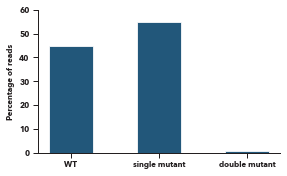

In [9]:
#--- Initialize variables ---
all_cooccs = {}
all_linker_vars = []
barcodes = ['R2-LOV_RAMPhaGE_Linker_Mut_D1', 'R2-LOV_P1_Neg_D2', 'R2-LOV_P1_Pos_D3', 'R2-LOV_P1_Pos_D4']

#--- Load and process cooccurrence data for each barcode ---
for barcode in barcodes: 
    FigFolder = f"{repo_root}/final_output/Nanopore/Nanopore_P0115/{barcode}/"
    with open(f"{FigFolder}/cooccurrences.txt", "r") as f:
        cooccurrences = f.read().split("\n")
    
    #--- Convert counts to percentages ---
    cooccs_counts = dict(Counter(cooccurrences))
    cooccs_perc = {k: v/sum(cooccs_counts.values())*100 for k, v in cooccs_counts.items()} 

    #--- Filter low-percentage variants (noise threshold < 0.01%) ---
    cooccs_perc_filt = {k: v for k, v in cooccs_perc.items() if v > 0.01}.copy()

    #--- Normalize filtered co-occurrences to 100% ---
    cooccs_perc_filt_norm = {k: v/sum(cooccs_perc_filt.values())*100 for k, v in cooccs_perc_filt.items()}
    
    #--- Add to master lists ---
    all_linker_vars = list(set(all_linker_vars+ list(cooccs_perc_filt_norm.keys())))
    all_cooccs[barcode] = cooccs_perc_filt_norm

#--- Create a DataFrame for all co-occurrences ---
all_cooccs_df = pd.DataFrame(index = [str(bc) for bc in barcodes], columns = all_linker_vars, data = 0.0)

#--- Fill DataFrame with actual percentages ---
for barcode in barcodes:
    for linker in all_linker_vars:
        all_cooccs_df.loc[str(barcode), linker] = all_cooccs[barcode].get(linker, 0)


#--- Categorize variants for barcode 13 ---
variants = {"WT":0, "single mutant": 0, "double mutant": 0}
for key, val in all_cooccs["R2-LOV_RAMPhaGE_Linker_Mut_D1"].items(): 
    if key == "wt_wt" or key == "wt_GS" or key == "SG_wt" or key == "SG_GS": 
        variants["WT"] += val

    elif "wt" in key or "GS" in key or "SG" in key: 
        variants["single mutant"] += val
        
    else: 
        variants["double mutant"] += val

#--- Plot the WT vs mutant distribution ---
fig = plt.figure(figsize=(wi1*0.6, hi/3))
plt.bar(variants.keys(), variants.values(), color = "#22577A", width = 0.5)
plt.ylim(top = 60)
plt.ylabel("Percentage of reads")
# plt.savefig("final_output/Nanopore_P0115/WT_single_double_linker_mutants_after_mut_barplot.pdf", bbox_inches = "tight", dpi = 600)
# plt.savefig("final_output/Nanopore_P0115/WT_single_double_linker_mutants_after_mut_barplot.pdf", bbox_inches = "tight", dpi = 600)

## Figure S12D:  Combined effects of DMS and linker library editing.
----------------------------
Phages were first
propagated on host cells carrying the DMS retron library (left), followed by propagation on host
cells containing the retron linker library (right). Total mutation frequency per position was
calculated across the LOV2 insert. “IDEAAK” linker residues at the end of LOV2 were excluded
from this DMS quantification, as they are encoded in the linker library. "Left Linker" and "Right
Linker" correspond to the frequencies of individual linker variants before and after the
subsequent application of the linker library. Data show the percentage of total reads containing
each linker variant, including off-target edits and edits at overlapping positions between libraries.
Variants occurring in `<0.05%` of reads were excluded. Only observed mutations are plotted;
variants that were encoded but not detected are not shown.



/var/folders/cg/wt3b_bn90c35ljrp5m4821pw0000gn/T/ipykernel_22483/935243702.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp0 = ax[0, 0].boxplot(
/var/folders/cg/wt3b_bn90c35ljrp5m4821pw0000gn/T/ipykernel_22483/935243702.py:51: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp1 = ax[0, 1].boxplot(
/var/folders/cg/wt3b_bn90c35ljrp5m4821pw0000gn/T/ipykernel_22483/935243702.py:69: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp2 = ax[1, 0].boxplot(
/var/folders/cg/wt3b_bn90c35ljrp5m4821pw0000gn/T/ipykernel_22483/935243702.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tic

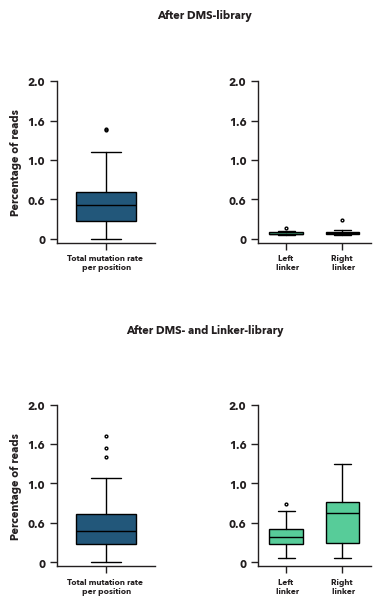

In [6]:
# === R35: Load linker distribution data for each barcode and read direction ===

left_linker_BC1 = pd.read_csv(f"{repo_root}/final_output/Illumina/AraC-LOV_RAMPhaGE_Multi-library_NGS/R1/enrichments/AA/R35_BC1_S1_R1_AA_linker_distribution.csv", index_col=0).T
right_linker_BC1 = pd.read_csv(f"{repo_root}/final_output/Illumina/AraC-LOV_RAMPhaGE_Multi-library_NGS/R2/enrichments/AA/R35_BC1_S1_R2_AA_linker_distribution.csv", index_col=0).T

left_linker_BC2 = pd.read_csv(f"{repo_root}/final_output/Illumina/AraC-LOV_RAMPhaGE_Multi-library_NGS/R1/enrichments/AA/R35_BC2_S1_R1_AA_linker_distribution.csv", index_col=0).T
right_linker_BC2 = pd.read_csv(f"{repo_root}/final_output/Illumina/AraC-LOV_RAMPhaGE_Multi-library_NGS/R2/enrichments/AA/R35_BC2_S1_R2_AA_linker_distribution.csv", index_col=0).T

BC1_enrichment = pd.read_csv(f"{repo_root}/final_output/Illumina/AraC-LOV_RAMPhaGE_Multi-library_NGS/enrichments/AA/R35_BC1_S1_combined_AA_enrichment_relative.csv", index_col=0)
BC2_enrichment = pd.read_csv(f"{repo_root}/final_output/Illumina/AraC-LOV_RAMPhaGE_Multi-library_NGS/enrichments/AA/R35_BC2_S1_combined_AA_enrichment_relative.csv", index_col=0)


ref_prot = "LATTLERIEKNFVITDPRLPDNPIIFASDSFLQLTEYSREEILGRNCRFLQGPETDRATVRKIRDAIDNQTEVTVQLINYTKSGKKFWNLFHLQPMRDQKGDVQYFIGVQLDGTEHVRDAAEREGVMLIKKTAEN"



# === Convert relative enrichment values from fraction to percentage for better interpretability ===

BC1_enrichment = BC1_enrichment*100
BC2_enrichment = BC2_enrichment*100

color_ax0 = "#22577A"
color_ax1 = "#57CC99"

offset = 0.05 

fig, ax = plt.subplots(2, 2, figsize=(wi3*2, hi/1.25), sharey='row')
fig.subplots_adjust(hspace=1.0, wspace=0.5)

# ------------------ Top row (BC1) ------------------
bp0 = ax[0, 0].boxplot(
    [BC1_enrichment.sum() + offset],
    labels=["Total mutation rate \n per position"],
    patch_artist=True, showfliers=True, widths=0.6,
    boxprops=dict(linewidth=1), medianprops=dict(linewidth=0.5),
    whiskerprops=dict(linewidth=1), capprops=dict(linewidth=1),
    flierprops=dict(markersize=2, markeredgewidth=1)
)
for box in bp0['boxes']:
    box.set(facecolor=color_ax0)
for median in bp0['medians']:
    median.set(color="black", linewidth=1)

ax[0, 0].tick_params(labelsize=8)
ax[0, 0].set_ylabel("Percentage of reads", fontsize=8)
ax[0, 0].set_ylim(0, 2.0)
ax[0, 0].set_aspect(0.8)

ll_bc1 = left_linker_BC1.iloc[0, :] if not left_linker_BC1.empty else [0.0]
rl_bc1 = right_linker_BC1.iloc[0, :] if not right_linker_BC1.empty else [0.0]
bp1 = ax[0, 1].boxplot(
    [ll_bc1 + offset, rl_bc1 + offset],
    labels=["Left \n linker", "Right \n linker"],
    patch_artist=True, showfliers=True, widths=0.6,
    boxprops=dict(linewidth=1), medianprops=dict(linewidth=0.5),
    whiskerprops=dict(linewidth=1), capprops=dict(linewidth=1),
    flierprops=dict(markersize=2, markeredgewidth=1)
)
for box in bp1['boxes']:
    box.set(facecolor=color_ax1)
for median in bp1['medians']:
    median.set(color="black", linewidth=1)

ax[0, 1].tick_params(labelsize=8)
ax[0, 1].set_ylim(0, 2.0)
ax[0, 1].set_aspect(1.4)

# ------------------ Bottom row (BC2) ------------------
bp2 = ax[1, 0].boxplot(
    [BC2_enrichment.sum() + offset],
    labels=["Total mutation rate \n per position"],
    patch_artist=True, showfliers=True, widths=0.6,
    boxprops=dict(linewidth=1), medianprops=dict(linewidth=0.5),
    whiskerprops=dict(linewidth=1), capprops=dict(linewidth=1),
    flierprops=dict(markersize=2, markeredgewidth=1)
)
for box in bp2['boxes']:
    box.set(facecolor=color_ax0)
for median in bp2['medians']:
    median.set(color="black", linewidth=1)

ax[1, 0].tick_params(labelsize=8)
ax[1, 0].set_ylabel("Percentage of reads", fontsize=8)
ax[1, 0].set_ylim(0.0, 2.0)
ax[1, 0].set_aspect(0.8)

ll_bc2 = left_linker_BC2.iloc[0, :] if not left_linker_BC2.empty else [0.0]
rl_bc2 = right_linker_BC2.iloc[0, :] if not right_linker_BC2.empty else [0.0]
bp3 = ax[1, 1].boxplot(
    [ll_bc2 + offset, rl_bc2 + offset],
    labels=["Left \n linker", "Right \n linker"],
    patch_artist=True, showfliers=True, widths=0.6,
    boxprops=dict(linewidth=1), medianprops=dict(linewidth=0.5),
    whiskerprops=dict(linewidth=1), capprops=dict(linewidth=1),
    flierprops=dict(markersize=2, markeredgewidth=1)
)
for box in bp3['boxes']:
    box.set(facecolor=color_ax1)
for median in bp3['medians']:
    median.set(color="black", linewidth=1)

ax[1, 1].tick_params(labelsize=8)
ax[1, 1].set_ylim(0, 2.0)
ax[1, 1].set_aspect(1.4)

ax[0, 0].set_xticklabels(["Total mutation rate \n per position"], fontsize=6)
ax[0, 1].set_xticklabels(["Left \n linker", "Right \n linker"], fontsize=6)
ax[1, 0].set_xticklabels(["Total mutation rate \n per position"], fontsize=6)
ax[1, 1].set_xticklabels(["Left \n linker", "Right \n linker"], fontsize=6)


fig.text(0.5, 0.98, "After DMS-library", ha='center', fontsize=8)
fig.text(0.5, 0.48, "After DMS- and Linker-library", ha='center', fontsize=8)

for axis in ax.flat:
    axis.tick_params(labelleft=True)

def visually_offset_zero(ax, zero_at=0.05, max_y=2.0, step=0.5):
    yticks = np.arange(zero_at + step, max_y + step, step)
    yticks = np.insert(yticks, 0, zero_at)
    ylabels = ['0'] + [str(round(y, 1)) for y in yticks[1:]]
    ax.set_yticks(yticks)
    ax.set_yticklabels(ylabels)

# Then apply:
for a in ax.flat:
    visually_offset_zero(a)

# plt.savefig(f"{repo_root}/final_output/AraC-LOV_RAMPhaGE_Multi-library_NGS/combined/plots/AA/R35_RL8_RL1_combined_boxplot.pdf", bbox_inches='tight', dpi=600)
# plt.savefig(f"{repo_root}/final_output/AraC-LOV_RAMPhaGE_Multi-library_NGS/combined/plots/AA/R35_RL8_RL1_combined_boxplot.png", bbox_inches='tight')
plt.show()